<a href="https://colab.research.google.com/github/onurozansunger/FDS-PROJECT/blob/main/deneme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings

In [2]:
netflix4 = pd.read_csv('/content/netflix4.csv')

In [3]:
netflix4.head()

,show_id,type,title,country,release_year,rating,averageRating,numVotes,genres,directors,category,primaryName
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,7.4,7119.0,"Biography,Documentary,Drama",nm0990310,actor,Michael Hilow
1,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,7.4,7119.0,"Biography,Documentary,Drama",nm0990310,actress,Ana Hoffman
2,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,8.0,22.0,"Crime,Documentary",nm1520612,actress,Susan Sarandon
3,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,7.3,528.0,"Crime,Drama,Mystery",nm0809375,director,Mike Smith
4,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,7.3,528.0,"Crime,Drama,Mystery",nm0809375,actor,Neill Rea


In [4]:
netflix4.drop([ 'directors', 'title'], axis=1, inplace=True)

In [5]:
netflix5=netflix4[netflix4['category']=='director']

In [6]:
netflix5.drop([ 'show_id'], axis=1, inplace=True)

<ipython-input-6-15106da2db6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix5.drop([ 'show_id'], axis=1, inplace=True)


In [7]:
netflix5.drop(['release_year'], axis=1, inplace=True)

<ipython-input-7-be45c2a4affe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix5.drop(['release_year'], axis=1, inplace=True)


In [8]:
netflix5.head()

,type,country,rating,averageRating,numVotes,genres,category,primaryName
3,TV Show,South Africa,TV-MA,7.3,528.0,"Crime,Drama,Mystery",director,Mike Smith
7,TV Show,South Africa,TV-MA,8.0,22.0,"Crime,Documentary",director,Steve Rivo
31,TV Show,NaN,TV-MA,7.2,11.0,"Crime,Short",director,Paul Desira
45,TV Show,NaN,TV-MA,7.6,55.0,Drama,director,Jirí Krejcík
54,TV Show,NaN,TV-MA,2.5,477.0,Horror,director,Tony Mandile


In [9]:
netflix5.columns

Index(['type', 'country', 'rating', 'averageRating', 'numVotes', 'genres',
       'category', 'primaryName'],
      dtype='object')

In [13]:
warnings.filterwarnings('ignore')

# 'rating' sütununu string'e dönüştürme
netflix5['rating'] = netflix5['rating'].astype(str)

# 'genres', 'country', 'primaryName' sütunlarını liste haline getirme ve 'type' sütununu binary'e dönüştürme
netflix5['genres'] = netflix5['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
netflix5['country'] = netflix5['country'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
netflix5['primaryName'] = netflix5['primaryName'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
netflix5['type'] = netflix5['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# 'rating', 'genres', 'country', 'primaryName' için benzersiz değerleri elde etme ve one-hot encoding uygulama
unique_ratings = netflix5['rating'].unique()
for rating in unique_ratings:
    netflix5['Rating_' + rating] = netflix5['rating'].apply(lambda x: 1 if x == rating else 0)

all_genres = sum(netflix5['genres'], [])
unique_genres = set(all_genres)
for genre in unique_genres:
    netflix5['Genre_' + genre] = netflix5['genres'].apply(lambda x: 1 if genre in x else 0)

all_countries = sum(netflix5['country'], [])
unique_countries = set(all_countries)
for country in unique_countries:
    netflix5['Country_' + country] = netflix5['country'].apply(lambda x: 1 if country in x else 0)

all_names = sum(netflix5['primaryName'], [])
unique_names = set(all_names)
for name in unique_names:
    netflix5['Name_' + name] = netflix5['primaryName'].apply(lambda x: 1 if name in x else 0)

# Orijinal kategorik sütunları kaldırma
netflix5.drop(['genres', 'country', 'primaryName', 'rating'], axis=1, inplace=True)

# Yeni DataFrame'in ilk beş satırını gösterme
print(netflix5.head())


    type  averageRating  numVotes  category  Rating_TV-MA  Rating_PG  \
3      0            7.3     528.0  director             1          0   
7      0            8.0      22.0  director             1          0   
31     0            7.2      11.0  director             1          0   
45     0            7.6      55.0  director             1          0   
54     0            2.5     477.0  director             1          0   

    Rating_PG-13  Rating_TV-PG  Rating_TV-14  Rating_TV-Y  ...  \
3              0             0             0            0  ...   
7              0             0             0            0  ...   
31             0             0             0            0  ...   
45             0             0             0            0  ...   
54             0             0             0            0  ...   

    Name_Maya Gallus  Name_Vic Sarin  Name_Mark Dennis  Name_Fred Schepisi  \
3                  0               0                 0                   0   
7             

In [14]:
netflix5.drop(['category', 'numVotes'], axis=1, inplace=True)

In [15]:
netflix5.head()

,type,averageRating,Rating_TV-MA,Rating_PG,Rating_PG-13,Rating_TV-PG,Rating_TV-14,Rating_TV-Y,Rating_TV-Y7,Rating_R,...,Name_Maya Gallus,Name_Vic Sarin,Name_Mark Dennis,Name_Fred Schepisi,Name_Louis Leterrier,Name_AnChi Shen,Name_Yui Umemoto,Name_Brendan J. Byrne,Name_Allan Bosire,Name_Robin Phillips
3,0,7.3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,8.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,7.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,0,7.6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,2.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
rating_df=netflix5["averageRating"]

<Axes: xlabel='averageRating'>

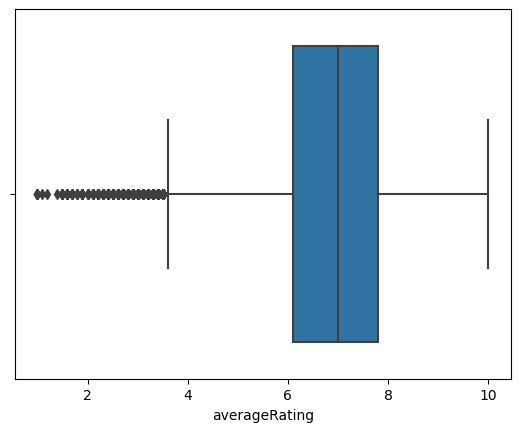

In [17]:
sns.boxplot(x=rating_df)

In [19]:
y_rating = netflix5['averageRating']

# IQR hesaplama
Q1 = y_rating.quantile(0.25)
Q3 = y_rating.quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri filtreleme
not_outlier = (y_rating >= (Q1 - 1.5 * IQR)) & (y_rating <= (Q3 + 1.5 * IQR))

# Aykırı değerleri atılmış yeni bir DataFrame oluşturma
netflix5_clean = netflix5[not_outlier]

In [20]:
ratings_df=netflix5_clean["averageRating"]

<Axes: xlabel='averageRating'>

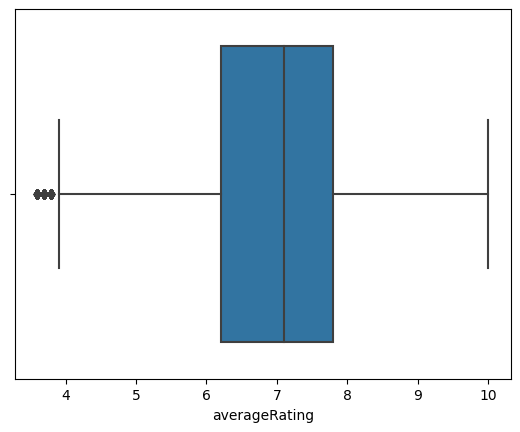

In [21]:
sns.boxplot(x=ratings_df)

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


# Özellikleri ve hedef değişkeni ayır
X = netflix5_clean.drop(['averageRating'], axis=1)  # 'numVotes' sütunu zaten çıkarıldı
y_rating = netflix5_clean['averageRating']

# Eğitim ve test setlerini ayır
X_train, X_test, y_rating_train, y_rating_test = train_test_split(X, y_rating, test_size=0.2, random_state=0)

# Random Forest regresyon modeli oluştur
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Modeli eğit
model_rf.fit(X_train, y_rating_train)

# Modelin performansını değerlendir
y_pred_rating_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_rating_test, y_pred_rating_rf)
scores_rf = cross_val_score(model_rf, X_train, y_rating_train, cv=5)

print(f'Random Forest Modelin Test MSE\'si: {mse_rf}')
print(f'Random Forest Çapraz Doğrulama Skorları: {scores_rf}')
print(f'Ortalama Random Forest Skoru: {scores_rf.mean()}')


Random Forest Modelin Test MSE'si: 1.3248950013858845
Random Forest Çapraz Doğrulama Skorları: [0.05824182 0.04375421 0.06663882 0.06493504 0.04942792]
Ortalama Random Forest Skoru: 0.05659956301969702


In [85]:
model_rating.named_steps['feature_selection'].get_support()

KeyError: ignored